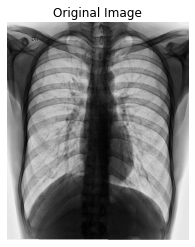

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = r'C:\Users\HP\Downloads\xrayy.jpg' 
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()


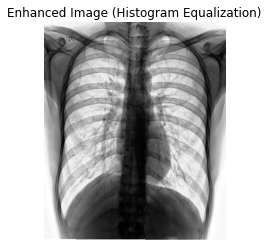

In [2]:
equalized_image = cv2.equalizeHist(original_image)

plt.imshow(equalized_image, cmap='gray')
plt.title('Enhanced Image (Histogram Equalization)')
plt.axis('off')
plt.show()


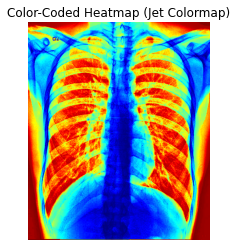

In [3]:
color_mapped_image = cv2.applyColorMap(equalized_image, cv2.COLORMAP_JET)

plt.imshow(cv2.cvtColor(color_mapped_image, cv2.COLOR_BGR2RGB))
plt.title('Color-Coded Heatmap (Jet Colormap)')
plt.axis('off')
plt.show()


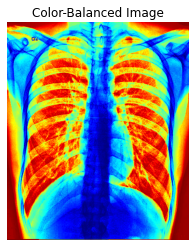

In [4]:
balanced_image = cv2.xphoto.createSimpleWB()
balanced_image.setP(0.5)  
balanced_image_image = balanced_image.balanceWhite(color_mapped_image)

plt.imshow(cv2.cvtColor(balanced_image_image, cv2.COLOR_BGR2RGB))
plt.title('Color-Balanced Image')
plt.axis('off')
plt.show()

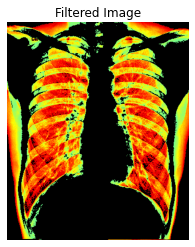

In [5]:
lower_range = 100  
upper_range = 200

mask = cv2.inRange(original_image, lower_range, upper_range)

filtered_image = cv2.bitwise_and(balanced_image_image, balanced_image_image, mask=mask)

plt.imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))
plt.title('Filtered Image')
plt.axis('off')
plt.show()

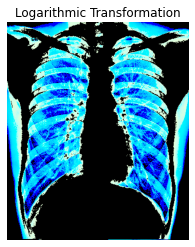

In [6]:
import numpy as np

def logarithmic_transform(x):
    return int(255 * np.log1p(x) / np.log(256))

log_transform_lut = np.array([logarithmic_transform(x) for x in range(256)], dtype=np.uint8)

log_transformed_image = cv2.LUT(filtered_image, log_transform_lut)

plt.imshow(log_transformed_image, cmap='gray')
plt.title('Logarithmic Transformation')
plt.axis('off')
plt.show()


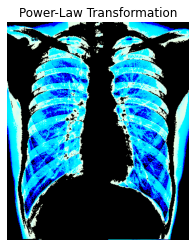

In [7]:
gamma = 0.7  

power_law_image = np.power(log_transformed_image / 255.0, gamma) * 255.0
power_law_image = power_law_image.astype(np.uint8)

plt.imshow(power_law_image, cmap='gray')
plt.title('Power-Law Transformation')
plt.axis('off')
plt.show()


## TASK: 2

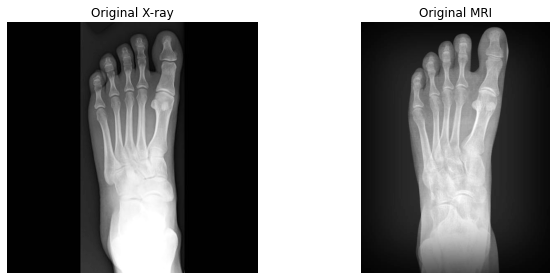

In [8]:
import cv2

xray_path = r'C:\Users\HP\Downloads\foot xray.jpg' 
mri_path = r'C:\Users\HP\Downloads\foot mri.jpg'     

xray_image = cv2.imread(xray_path, cv2.IMREAD_GRAYSCALE)
mri_image = cv2.imread(mri_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(xray_image, cmap='gray')
plt.title('Original X-ray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mri_image, cmap='gray')
plt.title('Original MRI')
plt.axis('off')

plt.tight_layout()
plt.show()


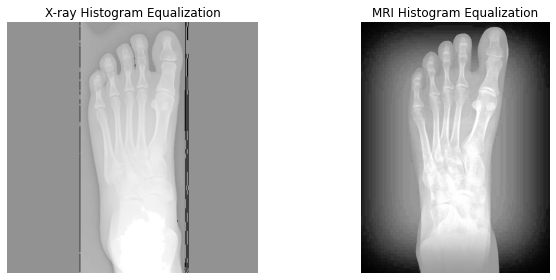

In [9]:
xray_equalized = cv2.equalizeHist(xray_image)
mri_equalized = cv2.equalizeHist(mri_image)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(xray_equalized, cmap='gray')
plt.title('X-ray Histogram Equalization')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mri_equalized, cmap='gray')
plt.title('MRI Histogram Equalization')
plt.axis('off')

plt.tight_layout()
plt.show()


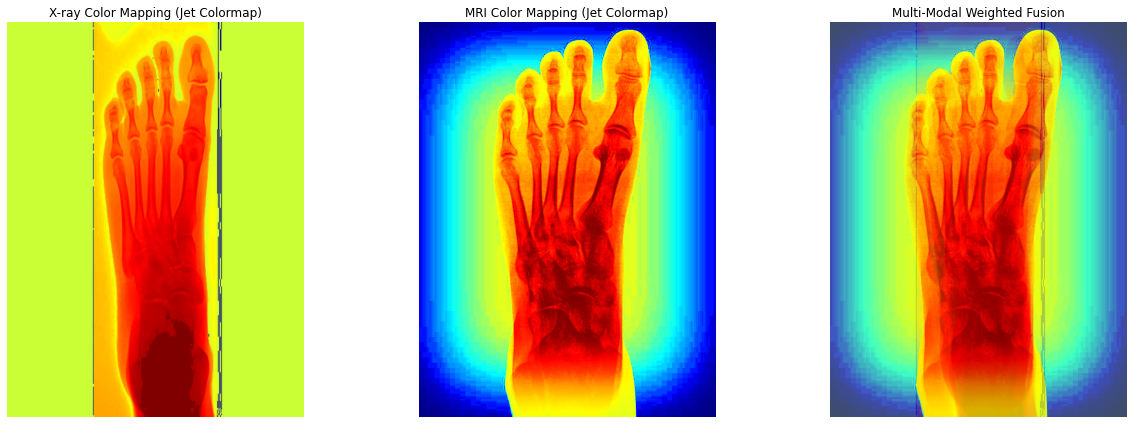

In [10]:
xray_color_mapped = cv2.applyColorMap(xray_equalized, cv2.COLORMAP_JET)
mri_color_mapped = cv2.applyColorMap(mri_equalized, cv2.COLORMAP_JET)

xray_color_mapped = cv2.resize(xray_color_mapped, (mri_color_mapped.shape[1], mri_color_mapped.shape[0]))

weight_xray = 0.3  
weight_mri = 0.7 

fused_image = cv2.addWeighted(xray_color_mapped, weight_xray, mri_color_mapped, weight_mri, 0)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(xray_color_mapped, cv2.COLOR_BGR2RGB))
plt.title('X-ray Color Mapping (Jet Colormap)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(mri_color_mapped, cv2.COLOR_BGR2RGB))
plt.title('MRI Color Mapping (Jet Colormap)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(fused_image, cv2.COLOR_BGR2RGB))
plt.title('Multi-Modal Weighted Fusion')
plt.axis('off')

plt.tight_layout()
plt.show()

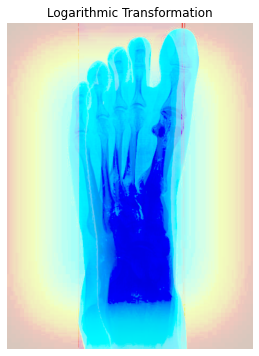

In [11]:
fused_image = cv2.addWeighted(xray_color_mapped, weight_xray, mri_color_mapped, weight_mri, 0)
fused_image = np.clip(fused_image, 0, 255).astype(np.uint8)

def logarithmic_transform(x):
    return int(255 * np.log1p(x) / np.log(256))

log_transform_lut = np.array([logarithmic_transform(x) for x in range(256)], dtype=np.uint8)

log_transformed_image = cv2.LUT(fused_image, log_transform_lut)

plt.figure(figsize=(6, 6))
plt.imshow(log_transformed_image, cmap='gray', vmin=0, vmax=255)
plt.title('Logarithmic Transformation')
plt.axis('off')
plt.show()


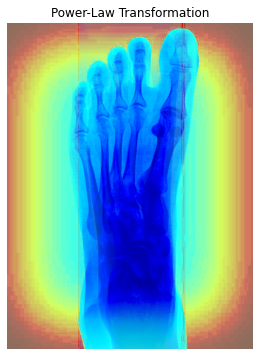

In [12]:
gamma = 0.7  
power_law_image = np.power(fused_image / 255.0, gamma) * 255.0
power_law_image = power_law_image.astype(np.uint8)

plt.figure(figsize=(6, 6))
plt.imshow(power_law_image, cmap='gray')
plt.title('Power-Law Transformation')
plt.axis('off')
plt.show()
